In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy import signal
from pmdarima.arima import auto_arima

In [15]:
df = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv", index_col = 0)
df[df['fips']==1001].head(20)

,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,rate_per_100000_primary_and_secondary_syphilis,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,2002,1001,72.0,4.0,54.0,3.0,159.3,8.8,119.5,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3134,2003,1001,95.0,0.0,71.0,2.0,207.6,0.0,155.2,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6268,2004,1001,86.0,2.0,68.0,0.0,183.2,4.3,144.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9402,2005,1001,97.0,0.0,64.0,0.0,202.6,0.0,133.7,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12536,2006,1001,183.0,0.0,81.0,0.0,372.6,0.0,164.9,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15670,2007,1001,184.0,0.0,104.0,1.0,369.2,0.0,208.7,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18804,2008,1001,155.0,4.0,66.0,5.0,307.9,7.9,131.1,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21938,2009,1001,214.0,0.0,53.0,3.0,421.1,0.0,104.3,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25072,2010,1001,198.0,3.0,30.0,2.0,361.5,5.5,54.8,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28284,2011,1001,247.0,0.0,58.0,1.0,447.2,0.0,105.0,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
counts = df['fips'].value_counts()
df = df[df['fips'].isin(counts[counts == 19].index)]
#ys
df['fips'].value_counts()
#df[df['fips']==30037]

1001     19
39139    19
39095    19
39097    19
39099    19
         ..
21121    19
21123    19
21125    19
21127    19
56045    19
Name: fips, Length: 3133, dtype: int64

In [17]:
cols = ['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis',
        'cases_primary_and_secondary_syphilis', 'year']

df = df[df['year'] >= 2002]
fips = df['fips'].unique()
print(len(fips))
print(df.dtypes)

3133
year                                                                               int64
fips                                                                               int64
cases_chlamydia                                                                  float64
cases_early_non-primary_non-secondary_syphilis                                   float64
cases_gonorrhea                                                                  float64
                                                                                  ...   
pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services    float64
pct_ind_other_services_except_public_administration                              float64
pct_ind_public_administration                                                    float64
health_insurance_rate                                                            float64
poverty_rate                                                                     float64
Length: 157, dty

In [11]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]

for index, i in enumerate(fips):
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", "cases_chlamydia"]]
    #print(df_model.shape)
    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[18, df_model.columns.get_loc('cases_chlamydia')]
    #print(df_model.head(20))
    #print(actual_value)
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(actual_value)
    
    model = auto_arima(df_model["cases_chlamydia"], trace=False, error_action='ignore', suppress_warnings=True)
    model.fit(df_model["cases_chlamydia"])
    
    pred = model.predict(n_periods = 1)
    fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    
    #print(model_fit.summary())
    if index <= 10:
        print(i , ':    ', actual_value, ' & ', fitted_value)

1001 :     315.0  &  337.7647058823529
1003 :     786.0  &  752.4153250715511
1005 :     155.0  &  197.154478960539
1007 :     123.0  &  121.00000000000001
1009 :     168.0  &  245.52941176470588
1011 :     79.0  &  80.65649037528927
1013 :     154.0  &  207.0
1015 :     511.0  &  829.0
1017 :     160.0  &  235.12328740971083
1019 :     70.0  &  72.0
1021 :     138.0  &  150.0


In [12]:
dff = pd.DataFrame()
dff['fips'] = fips
dff['pred_values_chlamydia'] = pred_values
dff['errors_chlamydia'] = errors

In [18]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]

for index, i in enumerate(fips):
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", "cases_gonorrhea"]]
    #print(df_model.shape)
    #df_model['cases_gonorrhea'] = signal.detrend(df_model.cases_gonorrhea)
    actual_value = df_model.iloc[18, df_model.columns.get_loc('cases_gonorrhea')] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    
    model = auto_arima(df_model["cases_gonorrhea"], trace=False, error_action='ignore', suppress_warnings=True)
    model.fit(df_model["cases_gonorrhea"])
    
    pred = model.predict(n_periods = 1)
    fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    
    #print(model_fit.summary())
    if index <= 10:
        print(i , ':    ', actual_value, ' & ', fitted_value)

1001 :     135.0  &  107.04403210389933
1003 :     265.0  &  230.0
1005 :     93.0  &  75.44444444444443
1007 :     82.0  &  52.69308798224985
1009 :     93.0  &  90.71793632762198
1011 :     28.0  &  33.84235260799958
1013 :     73.0  &  63.921631407887844
1015 :     276.0  &  326.6688440776554
1017 :     116.0  &  85.72222222222219
1019 :     50.0  &  34.676567684465795
1021 :     62.0  &  36.994953174494604


/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packag

In [19]:
dff['pred_values_gonorrhea'] = pred_values
dff['errors_gonorrhea'] = errors

In [23]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]

for index, i in enumerate(fips):
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", "cases_early_non-primary_non-secondary_syphilis"]]
    #print(df_model.shape)
    #df_model['cases_early_non-primary_non-secondary_syphilis'] = signal.detrend(df_model['cases_early_non-primary_non-secondary_syphilis'])
    actual_value = df_model.iloc[18, df_model.columns.get_loc('cases_early_non-primary_non-secondary_syphilis')]
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    
    model = auto_arima(df_model["cases_early_non-primary_non-secondary_syphilis"], trace=False, error_action='ignore', suppress_warnings=True)
    model.fit(df_model["cases_early_non-primary_non-secondary_syphilis"])
    
    pred = model.predict(n_periods = 1)
    fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    
    #print(model_fit.summary())
    if index <= 10:
        print(i , ':    ', actual_value, ' & ', fitted_value)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

1001 :     3.0  &  1.7222222222222219
1003 :     7.0  &  2.8888888888888884
1005 :     1.0  &  -0.5188846132169811
1007 :     0.0  &  0.9444444444444442
1009 :     2.0  &  0.4999999990245227
1011 :     2.0  &  0.8888888888888886
1013 :     0.0  &  0.2850761582198781
1015 :     10.0  &  6.306961137931525
1017 :     2.0  &  3.143327674489583
1019 :     1.0  &  0.3888888888888888
1021 :     1.0  &  0.4444444436630549


/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packag

In [24]:
dff['pred_values_early_non-primary_non-secondary_syphilis'] = pred_values
dff['errors_early_non-primary_non-secondary_syphilis'] = errors

In [25]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]

for index, i in enumerate(fips):
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", "cases_primary_and_secondary_syphilis"]]
    #print(df_model.shape)
    #df_model['cases_primary_and_secondary_syphilis'] = signal.detrend(df_model['cases_primary_and_secondary_syphilis'])
    actual_value = df_model.iloc[18, df_model.columns.get_loc('cases_primary_and_secondary_syphilis')]
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    
    model = auto_arima(df_model["cases_primary_and_secondary_syphilis"], trace=False, error_action='ignore', suppress_warnings=True)
    model.fit(df_model["cases_primary_and_secondary_syphilis"])
    
    pred = model.predict(n_periods = 1)
    fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    
    #print(model_fit.summary())
    if index <= 10:
        print(i , ':    ', actual_value, ' & ', fitted_value)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

1001 :     6.0  &  2.3435551267571917
1003 :     10.0  &  4.8888888888888875
1005 :     2.0  &  6.898008047895416
1007 :     0.0  &  1.0555555555555551
1009 :     0.0  &  0.4691618479450835
1011 :     0.0  &  0.4999999979160927
1013 :     1.0  &  1.0
1015 :     2.0  &  2.222222222222222
1017 :     4.0  &  6.4961928622908065
1019 :     0.0  &  0.0
1021 :     2.0  &  0.7222222222222221


/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/Users/dawsonkinsman/opt/anaconda3/lib/python3.9/site-packag

In [26]:
dff['pred_values_primary_and_secondary_syphilis'] = pred_values
dff['errors_early_primary_and_secondary_syphilis'] = errors

In [27]:
dff.head(20)

,fips,pred_values_chlamydia,errors_chlamydia,pred_values_gonorrhea,errors_gonorrhea,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis,pred_values_primary_and_secondary_syphilis,errors_early_primary_and_secondary_syphilis
0,1001,337.764706,-22.764706,107.044032,27.955968,1.722222,1.277778,2.343555e+00,3.656445e+00
1,1003,752.415325,33.584675,230.000000,35.000000,2.888889,4.111111,4.888889e+00,5.111111e+00
2,1005,197.154479,-42.154479,75.444444,17.555556,-0.518885,1.518885,6.898008e+00,-4.898008e+00
3,1007,121.000000,2.000000,52.693088,29.306912,0.944444,-0.944444,1.055556e+00,-1.055556e+00
4,1009,245.529412,-77.529412,90.717936,2.282064,0.500000,1.500000,4.691618e-01,-4.691618e-01
5,1011,80.656490,-1.656490,33.842353,-5.842353,0.888889,1.111111,5.000000e-01,-5.000000e-01
6,1013,207.000000,-53.000000,63.921631,9.078369,0.285076,-0.285076,1.000000e+00,0.000000e+00
7,1015,829.000000,-318.000000,326.668844,-50.668844,6.306961,3.693039,2.222222e+00,-2.222222e-01
8,1017,235.123287,-75.123287,85.722222,30.277778,3.143328,-1.143328,6.496193e+00,-2.496193e+00
9,1019,72.000000,-2.000000,34.676568,15.323432,0.388889,0.611111,0.000000e+00,0.000000e+00


In [28]:
dff.head(10)

,fips,pred_values_chlamydia,errors_chlamydia,pred_values_gonorrhea,errors_gonorrhea,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis,pred_values_primary_and_secondary_syphilis,errors_early_primary_and_secondary_syphilis
0,1001,337.764706,-22.764706,107.044032,27.955968,1.722222,1.277778,2.343555,3.656445
1,1003,752.415325,33.584675,230.000000,35.000000,2.888889,4.111111,4.888889,5.111111
2,1005,197.154479,-42.154479,75.444444,17.555556,-0.518885,1.518885,6.898008,-4.898008
3,1007,121.000000,2.000000,52.693088,29.306912,0.944444,-0.944444,1.055556,-1.055556
4,1009,245.529412,-77.529412,90.717936,2.282064,0.500000,1.500000,0.469162,-0.469162
5,1011,80.656490,-1.656490,33.842353,-5.842353,0.888889,1.111111,0.500000,-0.500000
6,1013,207.000000,-53.000000,63.921631,9.078369,0.285076,-0.285076,1.000000,0.000000
7,1015,829.000000,-318.000000,326.668844,-50.668844,6.306961,3.693039,2.222222,-0.222222
8,1017,235.123287,-75.123287,85.722222,30.277778,3.143328,-1.143328,6.496193,-2.496193
9,1019,72.000000,-2.000000,34.676568,15.323432,0.388889,0.611111,0.000000,0.000000


In [82]:
pop = pd.read_csv('../Data/Final/STI0220_cov20_pop0220.csv', index_col = 0)
pop_cols = [pop.columns.to_list()[pop.columns.to_list().index('total_pop'):]]
pop_cols = [item for sublist in pop_cols for item in sublist]
pop_cols.extend(['fips','year'])
pop = pop[pop['year']==2020].loc[:,pop_cols]
pop_cols

['total_pop',
 'pct_female',
 'pct_white',
 'pct_black',
 'pct_native_american',
 'pct_asian',
 'pct_native_hawaiian_pacific_islander',
 'pct_two_or_more_races',
 'pct_hispanic',
 'per_capita_income_2020',
 'employment_pop_ratio',
 'unemployment_rate',
 'pct_ind_agriculture_forestry_fishing_and_hunting_and_mining',
 'pct_ind_construction',
 'pct_ind_manufacturing',
 'pct_ind_wholesale_trade',
 'pct_ind_retail_trade',
 'pct_ind_transportation_and_warehousing_and_utilities',
 'pct_ind_information',
 'pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing',
 'pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services',
 'pct_ind_educational_services_and_health_care_and_social_assistance',
 'pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services',
 'pct_ind_other_services_except_public_administration',
 'pct_ind_public_administration',
 'health_insurance_rate',
 'poverty_rate',
 'covid_cases',
 'fips',
 'year']

In [83]:
dfe = pd.merge(dff, pop, on = ['fips'], how = 'outer')
dfe.head(10)

,fips,pred_values_chlamydia,errors_chlamydia,pred_values_gonorrhea,errors_gonorrhea,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis,pred_values_primary_and_secondary_syphilis,errors_early_primary_and_secondary_syphilis,total_pop,...,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate,covid_cases,year
0,1001,337.764706,-22.764706,107.044032,27.955968,1.722222,1.277778,2.343555,3.656445,55639.0,...,5.5,9.8,20.4,8.4,5.0,10.7,92.0,15.2,4164.0,2020
1,1003,752.415325,33.584675,230.000000,35.000000,2.888889,4.111111,4.888889,5.111111,218289.0,...,7.6,10.7,19.3,9.9,5.0,5.3,90.5,9.2,13392.0,2020
2,1005,197.154479,-42.154479,75.444444,17.555556,-0.518885,1.518885,6.898008,-4.898008,25026.0,...,3.9,5.1,18.6,6.6,3.8,7.1,89.3,28.6,1492.0,2020
3,1007,121.000000,2.000000,52.693088,29.306912,0.944444,-0.944444,1.055556,-1.055556,22374.0,...,5.0,7.0,22.4,3.3,6.2,5.7,90.9,18.1,1817.0,2020
4,1009,245.529412,-77.529412,90.717936,2.282064,0.500000,1.500000,0.469162,-0.469162,57755.0,...,6.0,7.5,21.3,4.9,5.3,3.8,90.0,13.7,4584.0,2020
5,1011,80.656490,-1.656490,33.842353,-5.842353,0.888889,1.111111,0.500000,-0.500000,10173.0,...,1.7,3.2,14.1,8.1,3.4,8.8,89.5,29.5,846.0,2020
6,1013,207.000000,-53.000000,63.921631,9.078369,0.285076,-0.285076,1.000000,0.000000,19726.0,...,5.1,6.2,18.0,10.2,5.5,5.4,89.9,19.6,1493.0,2020
7,1015,829.000000,-318.000000,326.668844,-50.668844,6.306961,3.693039,2.222222,-0.222222,114324.0,...,3.8,6.9,22.7,8.5,4.4,7.7,90.0,15.8,9428.0,2020
8,1017,235.123287,-75.123287,85.722222,30.277778,3.143328,-1.143328,6.496193,-2.496193,33427.0,...,4.3,7.8,18.2,6.6,3.7,4.3,90.8,15.4,2310.0,2020
9,1019,72.000000,-2.000000,34.676568,15.323432,0.388889,0.611111,0.000000,0.000000,26035.0,...,3.5,3.7,23.4,6.2,5.0,5.4,90.5,12.9,1403.0,2020


In [84]:
cols2 = ['gonorrhea','chlamydia','early_non-primary_non-secondary_syphilis',
        'early_primary_and_secondary_syphilis']

for i in cols2:
    dfe['adj_errors_' + i] = dfe['errors_' + i]/dfe['total_pop']

dfe.drop(columns = 'year', inplace = True)

In [88]:
dfe.columns

Index(['fips', 'pred_values_chlamydia', 'errors_chlamydia',
       'pred_values_gonorrhea', 'errors_gonorrhea',
       'pred_values_early_non-primary_non-secondary_syphilis',
       'errors_early_non-primary_non-secondary_syphilis',
       'pred_values_primary_and_secondary_syphilis',
       'errors_early_primary_and_secondary_syphilis', 'total_pop',
       'pct_female', 'pct_white', 'pct_black', 'pct_native_american',
       'pct_asian', 'pct_native_hawaiian_pacific_islander',
       'pct_two_or_more_races', 'pct_hispanic', 'per_capita_income_2020',
       'employment_pop_ratio', 'unemployment_rate',
       'pct_ind_agriculture_forestry_fishing_and_hunting_and_mining',
       'pct_ind_construction', 'pct_ind_manufacturing',
       'pct_ind_wholesale_trade', 'pct_ind_retail_trade',
       'pct_ind_transportation_and_warehousing_and_utilities',
       'pct_ind_information',
       'pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing',
       'pct_ind_professional_scient

In [89]:
dfe['covid_cases'].head(20)

0      4164.0
1     13392.0
2      1492.0
3      1817.0
4      4584.0
5       846.0
6      1493.0
7      9428.0
8      2310.0
9      1403.0
10     2913.0
11      488.0
12     2357.0
13     1131.0
14     1011.0
15     3536.0
16     4573.0
17      835.0
18      501.0
19     2868.0
Name: covid_cases, dtype: float64

In [86]:
dfe.to_csv('../Data/Final/model1_pred_vals_errors.csv')

In [120]:
dfe[(dfe['errors_chlamydia']<0) & (dfe['errors_gonorrhea']>0)].sort_values(by = 'errors_gonorrhea', ascending = False).head(50)

,fips,pred_values_chlamydia,errors_chlamydia,pred_values_gonorrhea,errors_gonorrhea,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis,pred_values_primary_and_secondary_syphilis,errors_early_primary_and_secondary_syphilis,total_pop,...,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate,covid_cases,adj_errors_gonorrhea,adj_errors_chlamydia,adj_errors_early_non-primary_non-secondary_syphilis,adj_errors_early_primary_and_secondary_syphilis
2053,39035,12050.000000,-992.000000,5020.540431,2008.459569,48.862502,5.913750e+01,92.000000,117.000000,1241475.0,...,9.6,4.5,4.1,94.6,17.1,69251.0,0.001618,-0.000799,4.763487e-05,0.000094
1848,36055,6008.823529,-647.823529,2078.416051,1966.583949,102.094073,-2.094073e+00,259.231520,-47.231520,743084.0,...,8.2,4.3,3.1,96.8,14.1,33059.0,0.002647,-0.000872,-2.818084e-06,-0.000064
2571,48113,20121.190854,-1498.190854,7778.217020,1963.782980,847.000000,2.860000e+02,324.000000,-109.000000,2622634.0,...,9.2,5.1,2.3,79.2,14.6,189252.0,0.000749,-0.000571,1.090507e-04,-0.000042
1306,26163,15408.834794,-1573.834794,7019.154262,1801.845738,223.083758,1.991624e+01,317.197102,58.802898,1753059.0,...,10.0,4.5,3.4,94.0,21.3,84941.0,0.001028,-0.000898,1.136085e-05,0.000034
2066,39061,7126.000000,-303.000000,2731.151814,1424.848186,85.000000,-2.000000e+01,88.572221,-3.572221,815790.0,...,9.7,4.2,3.2,94.5,14.8,51124.0,0.001747,-0.000371,-2.451611e-05,-0.000004
1835,36029,5653.058824,-715.058824,1663.782201,1352.217799,45.411765,1.158824e+01,67.000000,-14.000000,918873.0,...,9.0,4.4,4.5,96.9,13.7,40585.0,0.001472,-0.000778,1.261136e-05,-0.000015
1942,37119,10098.588972,-767.588972,3048.795114,1274.204886,235.754124,6.224588e+01,238.000000,56.000000,1095170.0,...,9.5,5.0,1.8,88.6,10.9,61990.0,0.001163,-0.000701,5.683672e-05,0.000051
97,4013,30044.117647,-4307.117647,11297.647059,1037.352941,948.111617,-9.711162e+01,1111.913384,-17.913384,4412779.0,...,9.8,4.6,3.8,89.1,12.7,314464.0,0.000235,-0.000976,-2.200691e-05,-0.000004
739,18097,10318.000000,-259.000000,3887.506288,889.493712,196.294557,7.770544e+01,156.299845,110.700155,957337.0,...,9.8,4.4,4.0,90.2,16.4,69987.0,0.000929,-0.000271,8.116833e-05,0.000116
2733,48439,9172.058824,-706.058824,3164.629239,884.370761,168.000000,1.160000e+02,210.000000,63.000000,2077153.0,...,9.2,5.1,3.1,83.6,11.4,145279.0,0.000426,-0.000340,5.584567e-05,0.000030


/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_16009/1118073187.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


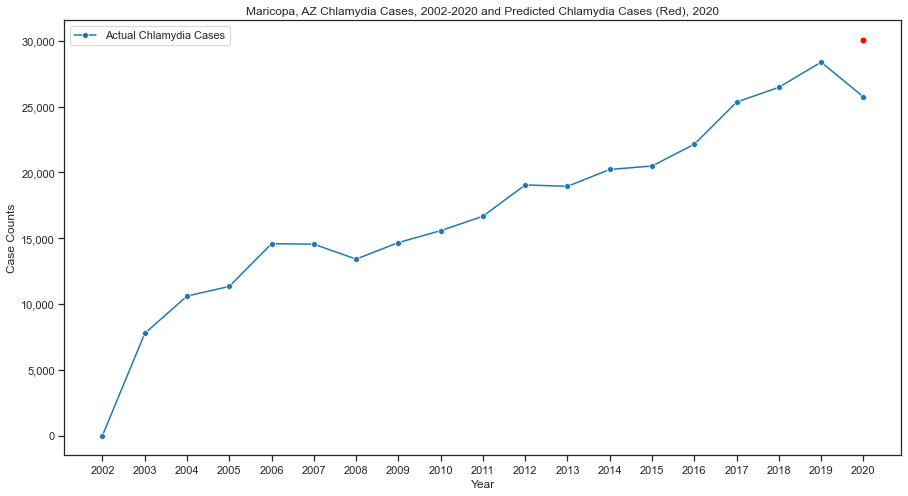

In [121]:
fitted_val = dfe[dfe['fips']==4013].loc[:,'pred_values_chlamydia']
sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df[df['fips']==4013], x = 'year', y = 'cases_chlamydia', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("Maricopa, AZ Chlamydia Cases, 2002-2020 and Predicted Chlamydia Cases (Red), 2020")
plt.legend(labels=["Actual Chlamydia Cases"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, fitted_val, marker='o', s=25, c="red")
plt.savefig('../Output/PosterPresentation/ModelOutputs/arima_chlamydia_county.png',dpi=300)
plt.show()

/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_16009/3769278940.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


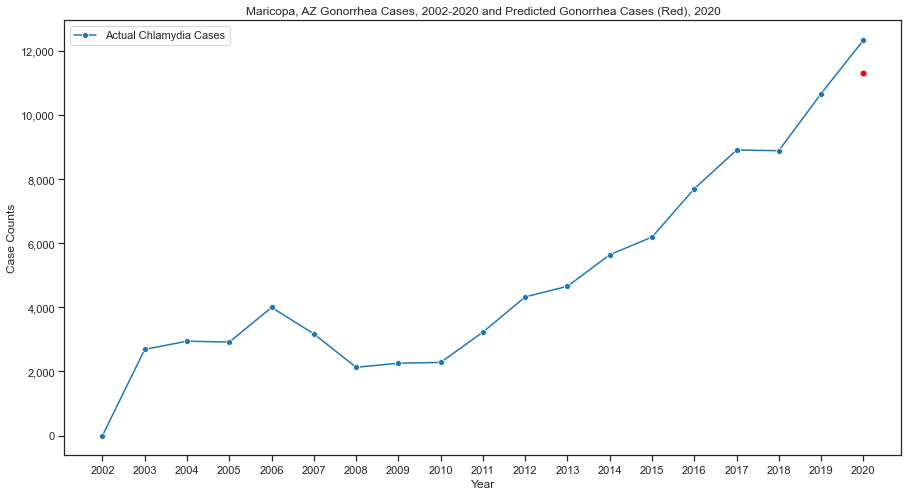

In [122]:
fitted_val = dfe[dfe['fips']==4013].loc[:,'pred_values_gonorrhea']
sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df[df['fips']==4013], x = 'year', y = 'cases_gonorrhea', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("Maricopa, AZ Gonorrhea Cases, 2002-2020 and Predicted Gonorrhea Cases (Red), 2020")
plt.legend(labels=["Actual Chlamydia Cases"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, fitted_val, marker='o', s=25, c="red")
plt.savefig('../Output/PosterPresentation/ModelOutputs/arima_gonorrhea_county.png',dpi=300)
plt.show()